In [1]:
from lib.utils import *
from lib.E15Analyzer import E15Analyzer
from lib.plot_utils import *
from lib.MyGeneAnalyzer import MyGeneAnalyzer
from lib.plot_utils import *
from lib.utils import *

import pandas..
importing path functions...
importing stat functions...
ipdb is not installed and cannot be imported...
importing misc functions..
importing done...
importing plot functions...


baseMean  log2FoldChange     lfcSE       stat         pvalue           padj
ENSMUSG00000038418   604.990348        3.401850  0.098889  34.400816  2.451595e-259  3.709509e-255
ENSMUSG00000059173   877.628225        2.279490  0.075218  30.305249  9.775943e-202  7.395989e-198
ENSMUSG00000037239  1053.641729        2.191706  0.077270  28.364265  5.582472e-177  2.815613e-173
ENSMUSG00000022055   811.628758        2.292641  0.086247  26.582256  1.088797e-155  4.118647e-152
ENSMUSG00000022602   146.888840        4.254540  0.160207  26.556491  2.161049e-155  6.539767e-152
...                         ...             ...       ...        ...            ...            ...
ENSMUSG00000099309     0.578443       -2.519205  2.494741  -1.009806   3.125881e-01            NaN
ENSMUSG00000099310     0.219154       -1.296502  4.398754  -0.294743   7.681902e-01            NaN
ENSMUSG00000099314     1.527836       -0.387802  1.500462  -0.258455   7.960558e-01            NaN
ENSMUSG00000099320     7.151215        0.480483  0.711721   0.675101   4.996118e-01            NaN
ENSMUSG00000099330     0.171759       -0.487320  4.403064  -0.110677   9.118721e-01            NaN

[23956 rows x 6 columns]

In [102]:
expr_all = []
expr_time = []
for treatment in ['KCl', 'bdnf']:
    for t in [1, 6, 10]:
        p1 = '../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_%s_vs_control_%s_allctrl.tsv' % (treatment, t)
        p2 = '../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_%s_vs_control_%s_matchedctrl.tsv' % (treatment, t)
        print(p1)
        print(p2)
        df1 = pd.read_csv(p1, sep='\t')
        df1['time.specific'] = True
        df1['stimuli'] = treatment
        df1['time'] = t
        df1['treatment'] = df1['stimuli'] + '_' + df1['time'].astype(str)
        df1['ensembl_gene_id'] = df1.index
        expr_all.append(df1)
        
        df2 = pd.read_csv(p2, sep='\t')
        df2['time.specific'] = True
        df2['stimuli'] = treatment
        df2['time'] = t
        df2['treatment'] = df2['stimuli'] + '_' + df2['time'].astype(str)
        df2['ensembl_gene_id'] = df2.index
        expr_time.append(df2)
    
expr_all = pd.concat(expr_all)
expr_time = pd.concat(expr_time)
    

../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_KCl_vs_control_1_allctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_KCl_vs_control_1_matchedctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_KCl_vs_control_6_allctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_KCl_vs_control_6_matchedctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_KCl_vs_control_10_allctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_KCl_vs_control_10_matchedctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_bdnf_vs_control_1_allctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_bdnf_vs_control_1_matchedctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_bdnf_vs_control_6_allctrl.tsv
../data/PNCRNAPOOL_DE_genes/deseq_matrix_PNCRNAPOOL_ensGene_Treatment_bdnf_vs_control_6_

In [103]:
expr_time['time'].value_counts()

1     46714
6     46038
10    45438
Name: time, dtype: int64

In [104]:
expr_all['time'].value_counts()

6     48204
1     48044
10    47912
Name: time, dtype: int64

In [2]:
# skip this
# expr_all = E15Analyzer.get_expr_values(tophat=True, basedir='../data/20180516_rna_tophat')
# expr_all = expr_all[expr_all['stimuli'] != 'forskolin']
# expr_all['time.specific'] = False

In [3]:
# skip this
# expr_time = []
# for t in [1, 6, 10]:
#     time_dir = join('../data/20180516_rna_tophat/time_%sh'% (str(t)))
#     print(time_dir)
#     bdnf = pd.read_csv(join(time_dir, 'bdnf_vs_control.tsv'), sep='\t')
#     bdnf['time.specific'] = True
#     bdnf['stimuli'] = 'bdnf'
#     bdnf['time'] = t
#     kcl = pd.read_csv(join(time_dir, 'KCl_vs_control.tsv'), sep='\t')
#     kcl['time.specific'] = True
#     kcl['stimuli'] = 'KCl'
#     kcl['time'] = t
#     expr_time.append(bdnf)
#     expr_time.append(kcl)
# expr_time = pd.concat(expr_time)    
# expr_time['ensembl_gene_id'] = expr_time.index


../data/20180516_rna_tophat/time_1h
../data/20180516_rna_tophat/time_6h
../data/20180516_rna_tophat/time_10h


In [74]:
expr_all

baseMean  log2FoldChange     lfcSE       stat    pvalue  padj  time.specific stimuli  time     ensembl_gene_id
ENSMUSG00000003545  1208.515773        9.881220  0.223231  44.264564  0.000000   0.0           True     KCl     1  ENSMUSG00000003545
ENSMUSG00000021250  1644.022556        7.341060  0.111807  65.658589  0.000000   0.0           True     KCl     1  ENSMUSG00000021250
ENSMUSG00000023034  1833.081518        6.864610  0.108932  63.017153  0.000000   0.0           True     KCl     1  ENSMUSG00000023034
ENSMUSG00000024042  1836.052309        2.912064  0.072881  39.956479  0.000000   0.0           True     KCl     1  ENSMUSG00000024042
ENSMUSG00000026826  1520.148083        4.686360  0.087523  53.544375  0.000000   0.0           True     KCl     1  ENSMUSG00000026826
...                         ...             ...       ...        ...       ...   ...            ...     ...   ...                 ...
ENSMUSG00000099309     0.578443       -2.519205  2.494741  -1.009806  0.312588   NaN           True    bdnf    10  ENSMUSG00000099309
ENSMUSG00000099310     0.219154       -1.296502  4.398754  -0.294743  0.768190   NaN           True    bdnf    10  ENSMUSG00000099310
ENSMUSG00000099314     1.527836       -0.387802  1.500462  -0.258455  0.796056   NaN           True    bdnf    10  ENSMUSG00000099314
ENSMUSG00000099320     7.151215        0.480483  0.711721   0.675101  0.499612   NaN           True    bdnf    10  ENSMUSG00000099320
ENSMUSG00000099330     0.171759       -0.487320  4.403064  -0.110677  0.911872   NaN           True    bdnf    10  ENSMUSG00000099330

[144160 rows x 10 columns]

In [75]:
expr_time

baseMean  log2FoldChange     lfcSE       stat         pvalue           padj  time.specific stimuli  time     ensembl_gene_id
ENSMUSG00000050711  3694.134641        2.776702  0.106328  26.114429  2.500060e-150  3.477334e-146           True    bdnf    10  ENSMUSG00000050711
ENSMUSG00000092035  4006.306525        2.232934  0.088460  25.242317  1.375418e-140  9.565347e-137           True    bdnf    10  ENSMUSG00000092035
ENSMUSG00000038418   709.551881        3.456835  0.141701  24.395264  1.920013e-131  8.901822e-128           True    bdnf    10  ENSMUSG00000038418
ENSMUSG00000022055   901.720094        2.347713  0.117339  20.007960   4.694742e-89   1.632479e-85           True    bdnf    10  ENSMUSG00000022055
ENSMUSG00000019960   605.047840        2.981212  0.151846  19.633133   8.058837e-86   2.241807e-82           True    bdnf    10  ENSMUSG00000019960
...                         ...             ...       ...        ...            ...            ...            ...     ...   ...                 ...
ENSMUSG00000099284     2.989744        0.572843  1.462610   0.391658   6.953107e-01            NaN           True    bdnf    10  ENSMUSG00000099284
ENSMUSG00000099289     0.616746       -1.980348  3.215902  -0.615798   5.380275e-01            NaN           True    bdnf    10  ENSMUSG00000099289
ENSMUSG00000099309     0.395715       -2.761449  4.103115  -0.673013   5.009392e-01            NaN           True    bdnf    10  ENSMUSG00000099309
ENSMUSG00000099314     1.458021       -0.292285  2.260589  -0.129296   8.971236e-01            NaN           True    bdnf    10  ENSMUSG00000099314
ENSMUSG00000099320     7.350515        0.692041  0.991984   0.697633   4.854068e-01            NaN           True    bdnf    10  ENSMUSG00000099320

[136314 rows x 10 columns]

In [4]:
from matplotlib import rcParams

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 7

In [95]:
expr_time['time'].value_counts()

10    136314
Name: time, dtype: int64

In [93]:
expr_time[(expr_time['stimuli'] == treatment) & (expr_time['time'] == '1')]

Empty DataFrame
Columns: [baseMean, log2FoldChange, lfcSE, stat, pvalue, padj, time.specific, stimuli, time, ensembl_gene_id, treatment]
Index: []

same.direction   False    True 
n.sig                          
0               2289.0  15312.0
1                  0.0   2570.0
2                  0.0   3186.0

In [115]:
m.groupby(['n.sig', 'same.direction']).size().reset_index().pivot('n.sig', 'same.direction', 0).fillna(0)

same.direction   False    True 
n.sig                          
0               2289.0  15312.0
1                  0.0   2570.0
2                  0.0   3186.0

same.direction   False    True 
n.sig                          
2                  0.0   3186.0
1                  0.0   2570.0
0               2289.0  15312.0


bdnf 1
same.direction     False    True 
n.label.sig                      
none              2289.0  15312.0
matched_controls     0.0     15.0
both                 0.0   3186.0
all_controls         0.0   2555.0

bdnf 6
same.direction     False    True 
n.label.sig                      
none              2478.0  14110.0
matched_controls     0.0     62.0
both                 0.0   3838.0
all_controls         0.0   2531.0

bdnf 10
same.direction     False    True 
n.label.sig                      
none              2677.0  13798.0
matched_controls     0.0     41.0
both                 0.0   3698.0
all_controls         0.0   2505.0

KCl 1
same.direction     False    True 
n.label.sig                      
none              1613.0  13552.0
matched_controls     0.0     18.0
both                 0.0   5333.0
all_controls         0.0   2841.0

KCl 6
same.direction     False    True 
n.label.sig                      
none              1787.0  11410.0
matched_controls     0.0     43.0
both     

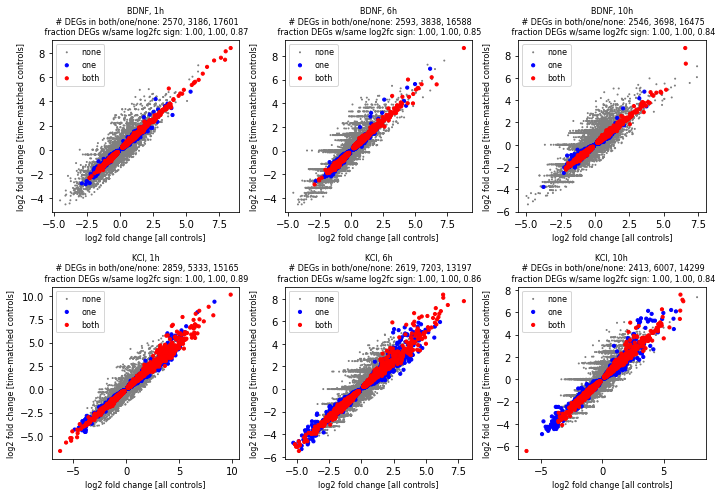

In [146]:
pi = 0
for treatment in ['bdnf', 'KCl']:
    for time in [1, 6, 10]:
        print('')
        print(treatment, time)
        plt.subplot(2, 3, pi + 1)
        sel_all = expr_all[expr_all['stimuli'] == treatment]
        sel_all[sel_all['time'] == time]
        
        sel_time = expr_time[expr_time['stimuli'] == treatment]
        sel_time = sel_time[sel_time['time'] == time]

        m = sel_all[(sel_all['time'] == time) & (sel_all['stimuli'] == treatment)].merge(sel_time, on='ensembl_gene_id')

        m['same.direction'] = np.sign(m['log2FoldChange_x']) == np.sign(m['log2FoldChange_y'])
        m['n.sig'] = (m['padj_x'] < 0.1).astype(int) + (m['padj_y'] < 0.1).astype(int)
        m['n.label.sig'] = np.where((m['padj_x'] < 0.1) & (m['padj_y'] < 0.1), 'both',
                                    np.where((m['padj_x'] < 0.1), 'all_controls', 
                                             np.where((m['padj_y'] < 0.1), 'matched_controls',
                                                      'none')))
                                  

        m = m.sort_values('n.sig')

        for n_sig in [0, 1, 2]:
            m_sel = m[m['n.sig'] == n_sig]
            plt.scatter(m_sel['log2FoldChange_x'], m_sel['log2FoldChange_y'],
                        color=m_sel['n.sig'].map({1:'blue', 2:'red', 0: 'gray'}), rasterized=True,
                        s=m_sel['n.sig'].map({1: 10, 2: 10, 0: 1}), label=['none', 'one', 'both'][n_sig])
        plt.legend(fontsize=8)        

        assert len(set(m['treatment_x'])) == 1 and len(set(m['treatment_x'])) == len(set(m['treatment_x']))
        code = ", ".join(m['n.sig'].value_counts().values[::-1].astype(str))
        
        prop_same = m.groupby(['n.sig', 'same.direction']).size().reset_index().pivot('n.sig', 'same.direction', 0).fillna(0).sort_values('n.sig', ascending=False)
        
        n_same = m.groupby(['n.label.sig', 'same.direction']).size().reset_index().pivot('n.label.sig', 'same.direction', 0).fillna(0).sort_values('n.label.sig', ascending=False)
        print(n_same)
        # print(prop_same)
        prop_same['prop.same'] = prop_same[True] / (prop_same[False] + prop_same[True])
        prop_same['prop.same']
        code2 = ", ".join([('%.2f' % f) for f in prop_same['prop.same']]) # .values[::-1]])

        plt.title(treatment.replace('bdnf', 'BDNF') + ', ' + str(time) + 'h\n # DEGs in both/one/none: %s\n fraction DEGs w/same log2fc sign: %s' % (code, code2),
                 fontsize=8)
        plt.xlabel('log2 fold change [all controls]', fontsize=8)
        plt.ylabel('log2 fold change [time-matched controls]', fontsize=8)
        pi += 1
        
plt.tight_layout()
plt.show()
# plt.savefig('../data/figures/degenes_control_by_sig.pdf')
# plt.close()